Comparaison Linéarité des capteurs :
===

LM35 :


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Température = [26.9952, 27.07576, 26.91463, 27.07576, 26.9952, 26.91463, 26.83406, 26.9952, 26.91463, 26.91463, 27.15633, 26.9952]
temps = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
fig, ax = plt.subplots()
ax.set_ylim(-5,50)
ax.plot(temps, Température, label ='T = f(t)', marker='o')
plt.grid ()
ax.set_xlabel('temps (s) ')
ax.set_ylabel('température (°C)')
ax.set_title("Température LM35")
plt.legend ()
plt.show()

DS18B20 (Sonde température)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

Température = [24.25, 24.25, 24.25, 24.1875, 24.25, 24.1875, 24.1875, 24.1875, 24.1875, 24.1875, 24.1875, 24.4375, 24.5]
temps = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
fig, ax = plt.subplots()
ax.set_ylim(-5,50)
ax.plot(temps, Température, label ='T = f(t)', marker='o')
plt.grid ()
ax.set_xlabel('temps (s) ')
ax.set_ylabel('température (°C)')
ax.set_title("Température sonde DS18B20")
plt.legend ()
plt.show()



In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import time
from pytz import timezone

# Données fournies
data = """
timestamp,c_dht,h_dht,c_bme,p_bme,h_bme
1713365437,23.30167,48.31617,21.87,996.40,41.93
1713365447,23.30167,48.00488,21.4,996.49,40.65
1713365457,23.28832,47.51507,21.39,996.53,40.32
1713365467,23.27497,47.35942,21.37,996.49,40.26
1713365477,23.30167,47.38537,21.35,996.54,40.25
1713365487,23.27497,47.4052,21.32,996.48,40.29
1713365497,23.28832,47.31212,21.3,996.48,40.35
1713365507,23.28832,47.44488,21.3,996.48,40.39
1713365517,23.28832,47.53796,21.27,996.43,40.43
"""

# Création d'un DataFrame à partir des données
df = pd.read_csv("/home/kylian/Bureau/orn_environmental_monitoring/Mesure/mesures.csv")

# Conversion du timestamp en datetime
#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


# Conversion du timestamp en datetime (heure UTC)
df['timestamp_utc'] = pd.to_datetime(df['timestamp'], unit='s')

# Ajout du décalage horaire de Paris (UTC+2 en été)
df['timestamp_paris'] = df['timestamp_utc'].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')

# Supprimer la colonne timestamp_utc si vous n'en avez plus besoin
df.drop(columns=['timestamp_utc'], inplace=True)
df

,timestamp,c_dht,h_dht,c_bme,p_bme,h_bme,timestamp_paris
0,1713365437,23.30167,48.31617,21.87,996.40,41.93,2024-04-17 16:50:37+02:00
1,1713365447,23.30167,48.00488,21.40,996.49,40.65,2024-04-17 16:50:47+02:00
2,1713365457,23.28832,47.51507,21.39,996.53,40.32,2024-04-17 16:50:57+02:00
3,1713365467,23.27497,47.35942,21.37,996.49,40.26,2024-04-17 16:51:07+02:00
4,1713365477,23.30167,47.38537,21.35,996.54,40.25,2024-04-17 16:51:17+02:00
...,...,...,...,...,...,...,...
5741,1713422847,19.01846,49.86801,17.10,1001.80,43.50,2024-04-18 08:47:27+02:00
5742,1713422857,19.01846,49.89090,17.10,1001.75,43.50,2024-04-18 08:47:37+02:00
5743,1713422867,19.01846,50.00992,17.13,1001.74,43.73,2024-04-18 08:47:47+02:00
5744,1713422877,19.05852,51.50072,17.19,1001.76,45.58,2024-04-18 08:47:57+02:00


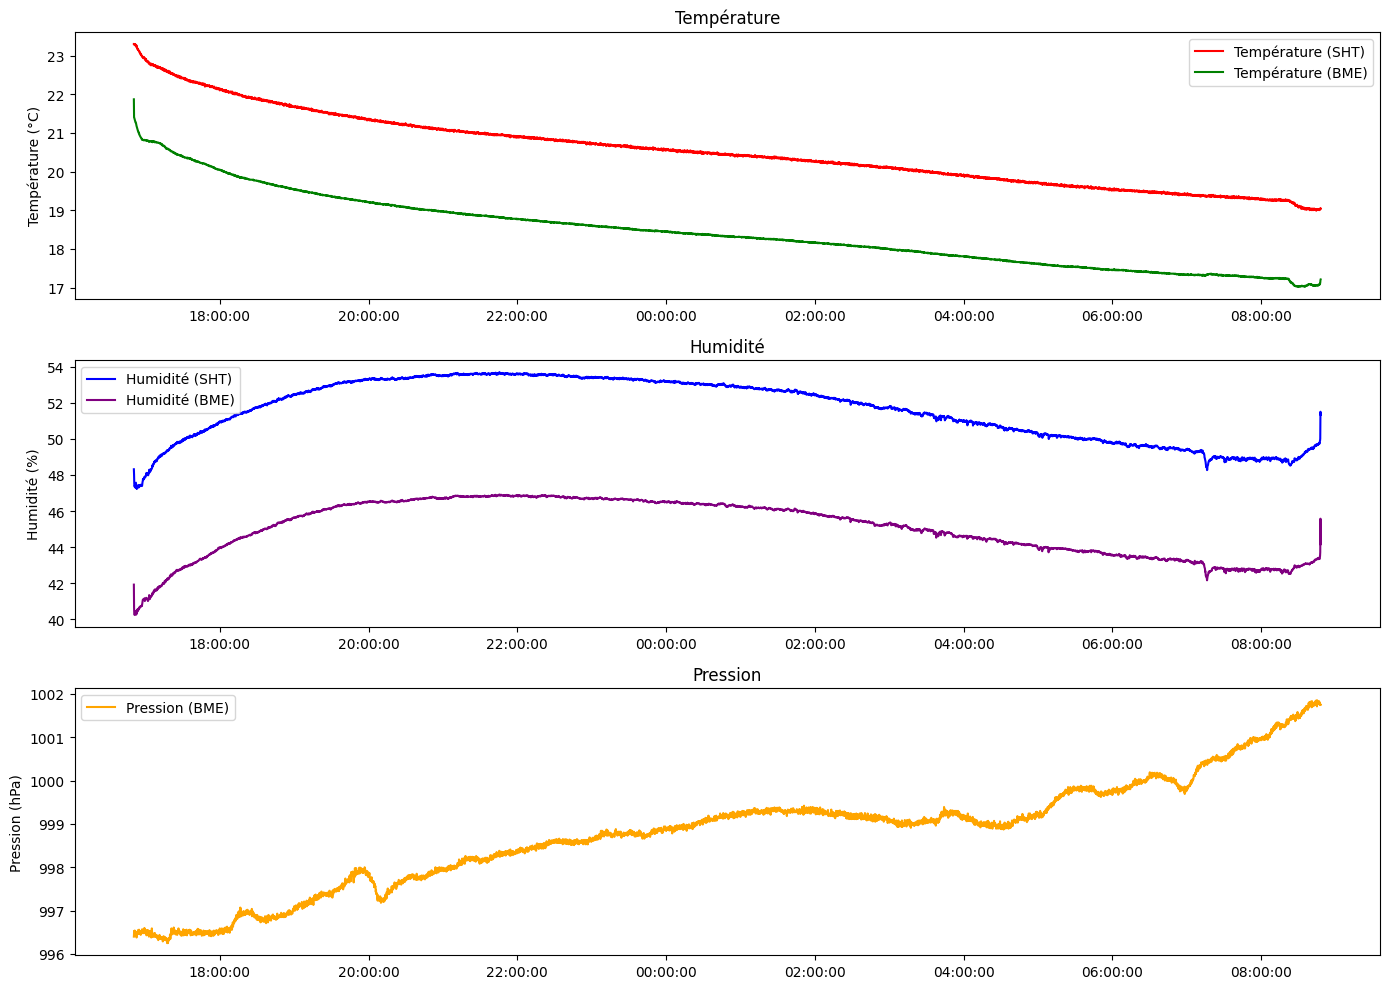

In [2]:
# Supposons que df est votre DataFrame contenant le timestamp


# Création des subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 10))



# Tracé des données
axs[0].plot(df['timestamp_paris'], df['c_dht'], color='red', label='Température (SHT)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[1].plot(df['timestamp_paris'], df['h_dht'], color='blue', label='Humidité (SHT)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

axs[0].plot(df['timestamp_paris'], df['c_bme'], color='green', label='Température (BME)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[2].plot(df['timestamp_paris'], df['p_bme'], color='orange', label='Pression (BME)')
axs[2].set_title('Pression')
axs[2].set_ylabel('Pression (hPa)')

axs[1].plot(df['timestamp_paris'], df['h_bme'], color='purple', label='Humidité (BME)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

# Ajout de la légende
for ax in axs.flat:
    ax.legend()

# Formatter les dates sur l'axe x en heures avec le fuseau horaire de Paris
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S', tz=timezone('Europe/Paris')))


# Ajustement du placement des subplots
plt.tight_layout()

# Affichage du graphique
#plt.show()

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import time
from pytz import timezone

# Données fournies
data = """
timestamp,c_sht,h_sht,c_bme,p_bme,h_bme,c_lm,c_dht,lux_diode
1713451549,21.0399,51.73418,19.9,1004.34,43.30,5.962005,63.22423
1713451559,21.05325,51.57397,19.39,1004.44,43.37,5.478599,62.78477
1713451569,21.05325,51.58312,19.39,1004.42,43.51,5.478599,62.49027
1713451579,21.0399,51.53735,19.37,1004.40,43.55,5.398031,62.51621
1713451589,21.0399,51.52514,19.37,1004.48,43.43,5.398031,62.54063
1713451599,21.0399,51.45953,19.34,1004.43,43.51,5.398031,62.56504
1713451609,21.05325,51.48394,19.34,1004.43,43.57,5.398031,62.63828
1713451619,21.02388,51.40917,19.33,1004.39,43.55,5.478599,63.05333
1713451629,21.0399,51.37408,19.32,1004.45,43.40,5.398031,63.22423
"""

# Création d'un DataFrame à partir des données
df = pd.read_csv("/home/kylian/Bureau/orn_environmental_monitoring/Mesure/mesures4capteurs.csv")

# Conversion du timestamp en datetime
#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


# Conversion du timestamp en datetime (heure UTC)
df['timestamp_utc'] = pd.to_datetime(df['timestamp'], unit='s')

# Ajout du décalage horaire de Paris (UTC+2 en été)
df['timestamp_paris'] = df['timestamp_utc'].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')

# Supprimer la colonne timestamp_utc si vous n'en avez plus besoin
df.drop(columns=['timestamp_utc'], inplace=True)
df

,timestamp,c_sht,h_sht,c_bme,p_bme,h_bme,c_lm,c_dht,lux_diode,timestamp_paris
0,1713451549,21.03990,51.73418,19.90,1004.34,43.30,5.962005,63.22423,NaN,2024-04-18 16:45:49+02:00
1,1713451559,21.05325,51.57397,19.39,1004.44,43.37,5.478599,62.78477,NaN,2024-04-18 16:45:59+02:00
2,1713451569,21.05325,51.58312,19.39,1004.42,43.51,5.478599,62.49027,NaN,2024-04-18 16:46:09+02:00
3,1713451579,21.03990,51.53735,19.37,1004.40,43.55,5.398031,62.51621,NaN,2024-04-18 16:46:19+02:00
4,1713451589,21.03990,51.52514,19.37,1004.48,43.43,5.398031,62.54063,NaN,2024-04-18 16:46:29+02:00
...,...,...,...,...,...,...,...,...,...,...
5876,1713510309,18.91966,53.37759,17.40,1004.37,45.12,5.398031,68.32685,NaN,2024-04-19 09:05:09+02:00
5877,1713510319,18.90364,53.20973,17.40,1004.38,45.12,5.478599,69.23170,NaN,2024-04-19 09:05:19+02:00
5878,1713510329,18.90364,53.16701,17.38,1004.38,45.12,5.398031,68.47334,NaN,2024-04-19 09:05:29+02:00
5879,1713510339,18.90364,53.04799,17.39,1004.41,45.09,5.398031,68.71748,NaN,2024-04-19 09:05:39+02:00


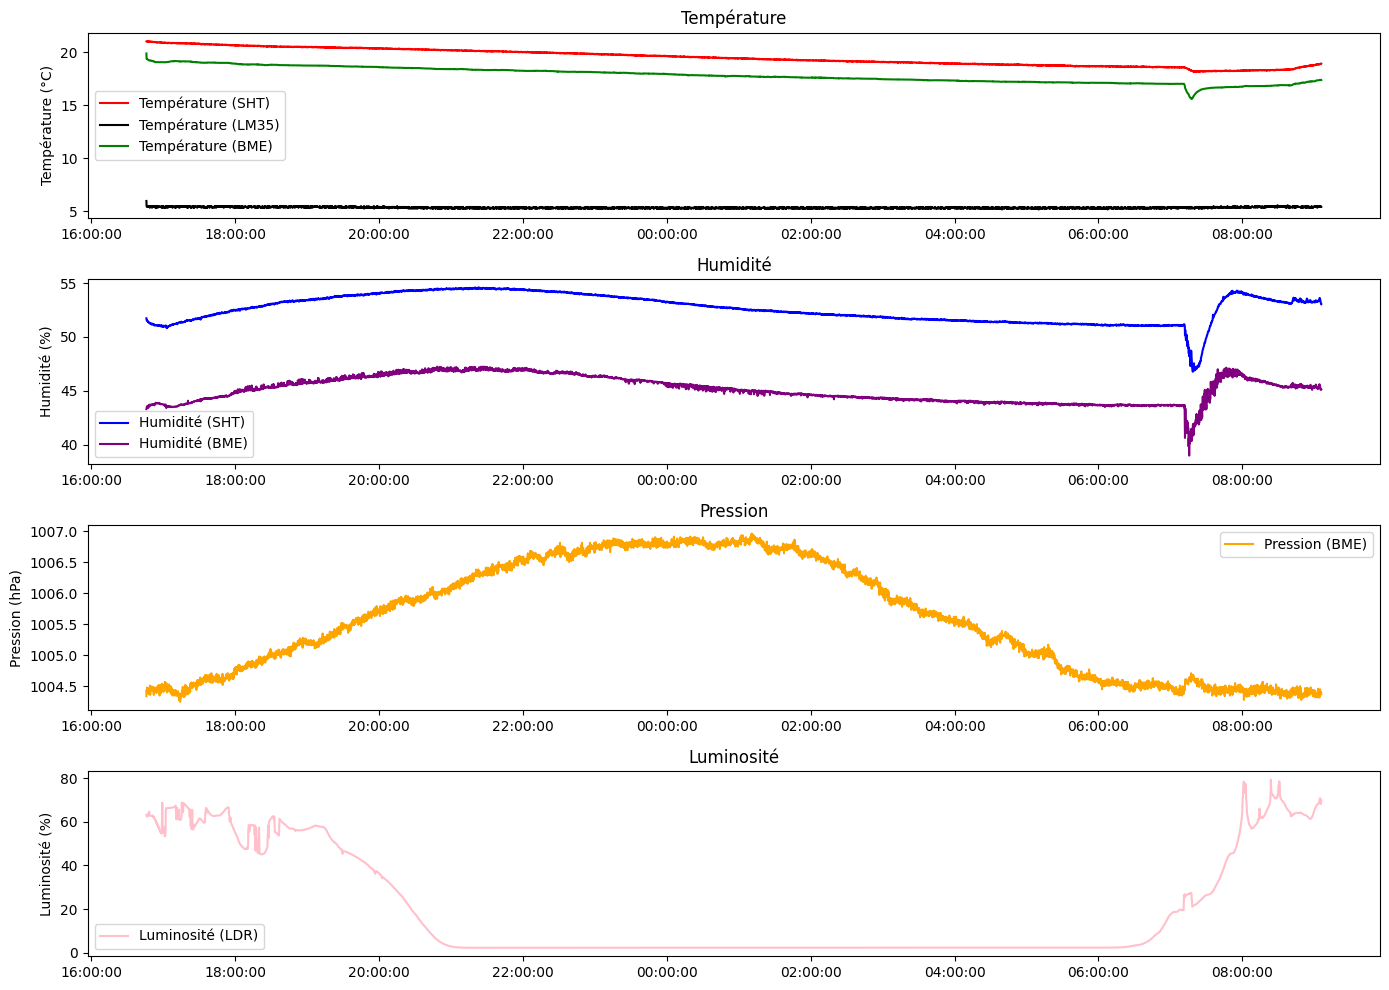

In [5]:
# Supposons que df est votre DataFrame contenant le timestamp


# Création des subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 10))



# Tracé des données
axs[0].plot(df['timestamp_paris'], df['c_sht'], color='red', label='Température (SHT)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[1].plot(df['timestamp_paris'], df['h_sht'], color='blue', label='Humidité (SHT)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

axs[0].plot(df['timestamp_paris'], df['c_lm'], color='black', label='Température (LM35)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[0].plot(df['timestamp_paris'], df['c_bme'], color='green', label='Température (BME)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[2].plot(df['timestamp_paris'], df['p_bme'], color='orange', label='Pression (BME)')
axs[2].set_title('Pression')
axs[2].set_ylabel('Pression (hPa)')

axs[1].plot(df['timestamp_paris'], df['h_bme'], color='purple', label='Humidité (BME)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

axs[3].plot(df['timestamp_paris'], df['c_dht'], color='pink', label='Luminosité (LDR)')
axs[3].set_title('Luminosité')
axs[3].set_ylabel('Luminosité (%)')

# Ajout de la légende
for ax in axs.flat:
    ax.legend()

# Formatter les dates sur l'axe x en heures avec le fuseau horaire de Paris
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S', tz=timezone('Europe/Paris')))


# Ajustement du placement des subplots
plt.tight_layout()

# Affichage du graphique
#plt.show()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import time
from pytz import timezone

# Données fournies
data = """
timestamp,c_sht,h_sht,c_bme,p_bme,h_bme,c_lm,lux_diode
1713511211,21.42176,49.14016,20.38,1001.15,40.87,22.88624,72.96712
1713511221,21.40841,49.15236,19.92,1001.27,41.08,22.80568,73.1136
1713511231,21.40841,49.15236,19.92,1001.20,41.06,22.88624,72.64973
1713511241,21.43511,49.06081,19.92,1001.21,41.13,22.88624,72.57648
1713511251,21.42176,48.91584,19.92,1001.25,41.14,22.88624,72.43
1713511261,21.43511,48.90669,19.92,1001.19,41.13,22.88624,72.13703
1713511271,21.42176,48.89296,19.92,1001.18,41.13,22.88624,71.64874
1713511281,21.43511,48.82429,19.92,1001.15,41.06,22.80568,71.57549
1713511291,21.42176,48.84565,19.91,1001.20,41.08,22.88624,72.01495
"""

# Création d'un DataFrame à partir des données
df = pd.read_csv("/home/kylian/Bureau/orn_environmental_monitoring/mesures4capteurs.csv")

# Conversion du timestamp en datetime
#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


# Conversion du timestamp en datetime (heure UTC)
df['timestamp_utc'] = pd.to_datetime(df['timestamp'], unit='s')

# Ajout du décalage horaire de Paris (UTC+2 en été)
df['timestamp_paris'] = df['timestamp_utc'].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')

# Supprimer la colonne timestamp_utc si vous n'en avez plus besoin
df.drop(columns=['timestamp_utc'], inplace=True)
df

,timestamp,c_sht,h_sht,c_bme,p_bme,h_bme,c_lm,lux_diode,timestamp_paris
0,1713511211,21.42176,49.14016,20.38,1001.15,40.87,22.88624,72.96712,2024-04-19 09:20:11+02:00
1,1713511221,21.40841,49.15236,19.92,1001.27,41.08,22.80568,73.11360,2024-04-19 09:20:21+02:00
2,1713511231,21.40841,49.15236,19.92,1001.20,41.06,22.88624,72.64973,2024-04-19 09:20:31+02:00
3,1713511241,21.43511,49.06081,19.92,1001.21,41.13,22.88624,72.57648,2024-04-19 09:20:41+02:00
4,1713511251,21.42176,48.91584,19.92,1001.25,41.14,22.88624,72.43000,2024-04-19 09:20:51+02:00
...,...,...,...,...,...,...,...,...,...
16494,1713676151,19.49912,47.67071,17.97,1005.46,40.38,20.87205,74.67612,2024-04-21 07:09:11+02:00
16495,1713676161,19.49912,47.64782,17.97,1005.49,40.37,20.79148,74.52964,2024-04-21 07:09:21+02:00
16496,1713676171,19.51247,47.62494,17.97,1005.54,40.52,20.95262,74.40756,2024-04-21 07:09:31+02:00
16497,1713676181,19.46975,47.69360,17.96,1005.55,40.58,20.87205,74.30991,2024-04-21 07:09:41+02:00


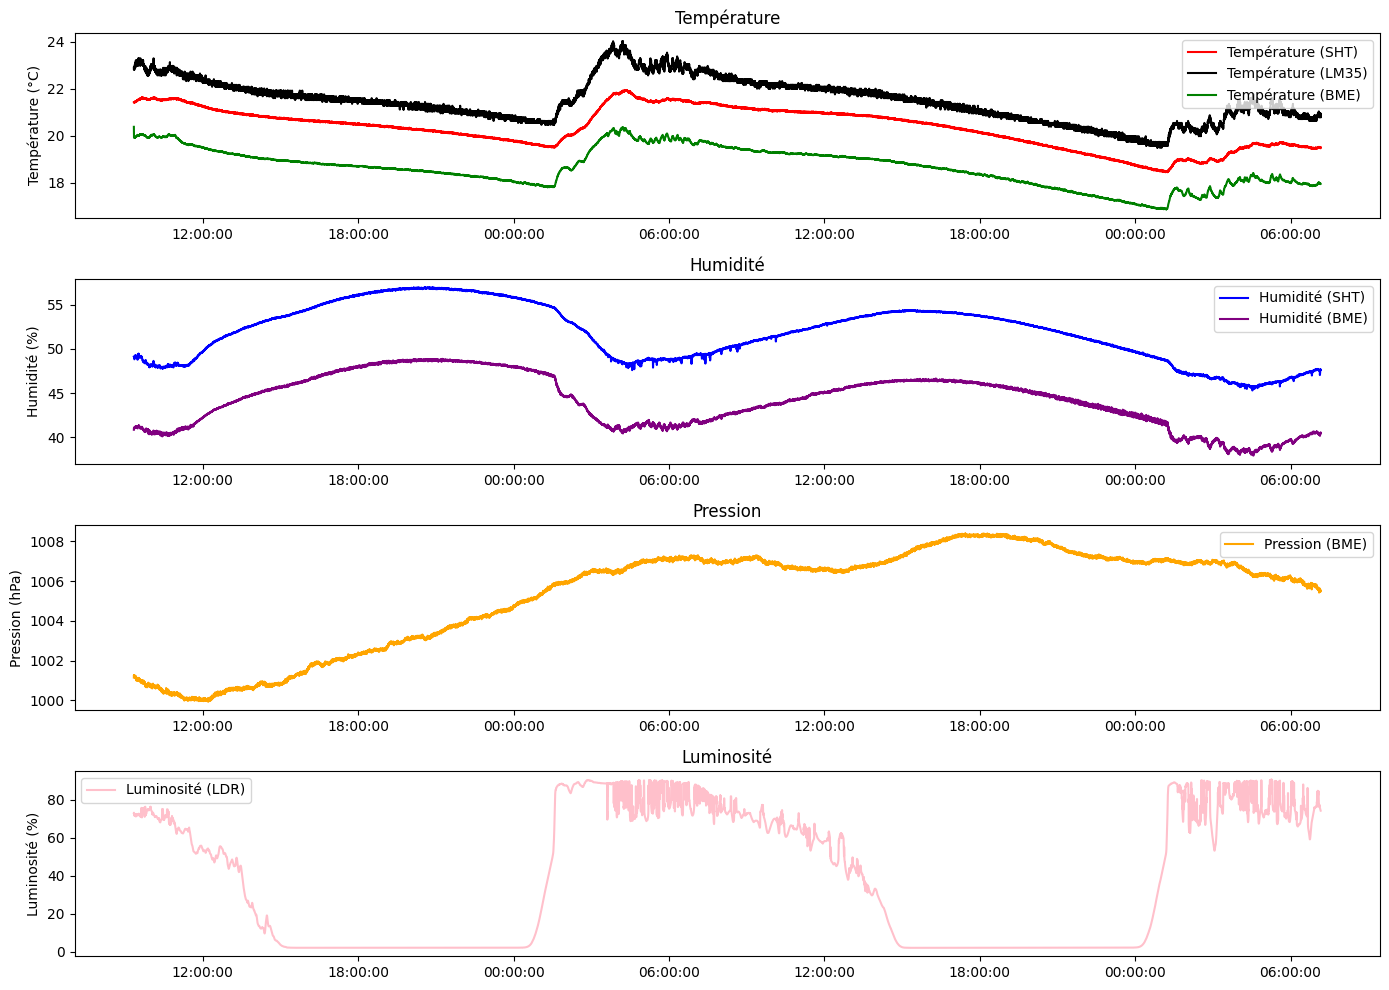

In [4]:
# Supposons que df est votre DataFrame contenant le timestamp


# Création des subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 10))



# Tracé des données
axs[0].plot(df['timestamp_paris'], df['c_sht'], color='red', label='Température (SHT)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[1].plot(df['timestamp_paris'], df['h_sht'], color='blue', label='Humidité (SHT)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

axs[0].plot(df['timestamp_paris'], df['c_lm'], color='black', label='Température (LM35)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[0].plot(df['timestamp_paris'], df['c_bme'], color='green', label='Température (BME)')
axs[0].set_title('Température')
axs[0].set_ylabel('Température (°C)')

axs[2].plot(df['timestamp_paris'], df['p_bme'], color='orange', label='Pression (BME)')
axs[2].set_title('Pression')
axs[2].set_ylabel('Pression (hPa)')

axs[1].plot(df['timestamp_paris'], df['h_bme'], color='purple', label='Humidité (BME)')
axs[1].set_title('Humidité')
axs[1].set_ylabel('Humidité (%)')

axs[3].plot(df['timestamp_paris'], df['lux_diode'], color='pink', label='Luminosité (LDR)')
axs[3].set_title('Luminosité')
axs[3].set_ylabel('Luminosité (%)')

# Ajout de la légende
for ax in axs.flat:
    ax.legend()

# Formatter les dates sur l'axe x en heures avec le fuseau horaire de Paris
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S', tz=timezone('Europe/Paris')))


# Ajustement du placement des subplots
plt.tight_layout()

# Affichage du graphique
#plt.show()